In [3]:
#We have to to perform exploratory data analysis first to understand the data

#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#read the data
df = pd.read_csv('train.csv')

In [5]:
#find the shape of the dataset
df.shape

(1460, 81)

In [6]:
df.head() #first 5 rows of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.tail() #last 5 rows of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
#finding out how many NaN values are there in each feature

features_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),'%')

LotFrontage 0.1774 %
Alley 0.9377 %
MasVnrType 0.0055 %
MasVnrArea 0.0055 %
BsmtQual 0.0253 %
BsmtCond 0.0253 %
BsmtExposure 0.026 %
BsmtFinType1 0.0253 %
BsmtFinType2 0.026 %
FireplaceQu 0.4726 %
GarageType 0.0555 %
GarageYrBlt 0.0555 %
GarageFinish 0.0555 %
GarageQual 0.0555 %
GarageCond 0.0555 %
PoolQC 0.9952 %
Fence 0.8075 %
MiscFeature 0.963 %


**Find out relationship b/w missing values and label i.e, Sales Price**

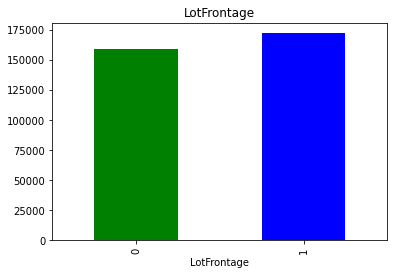

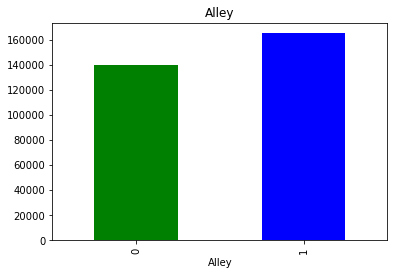

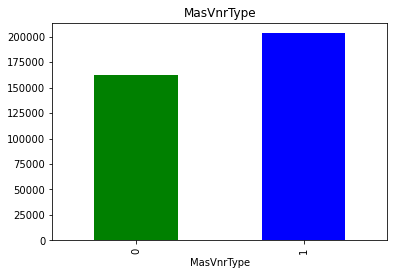

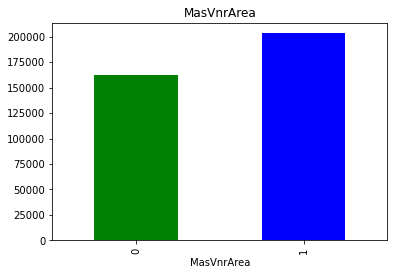

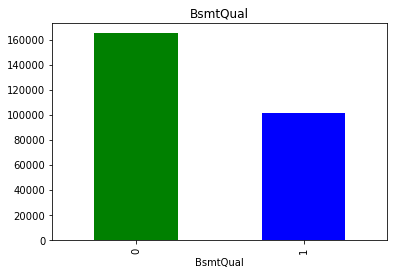

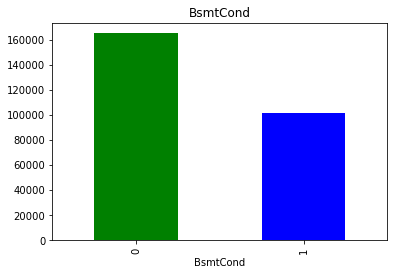

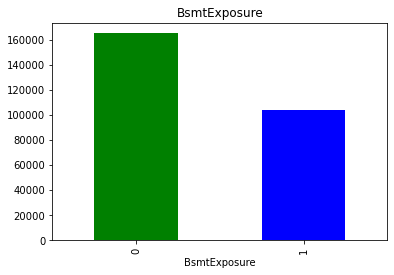

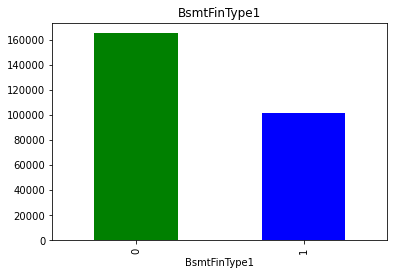

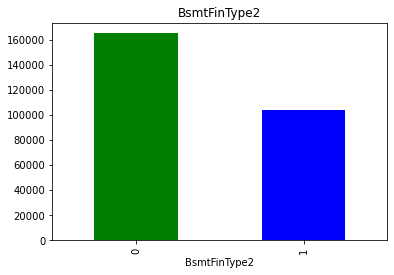

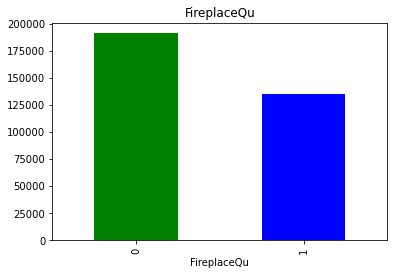

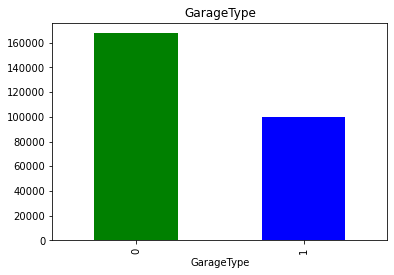

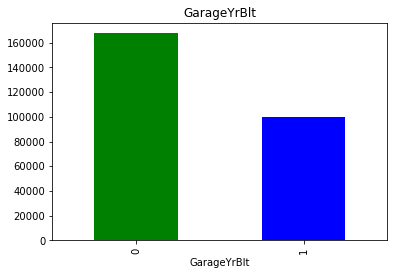

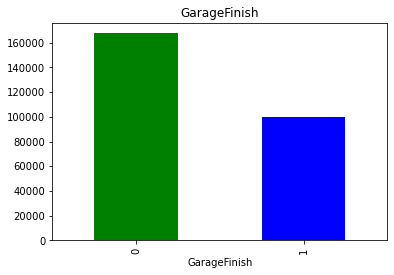

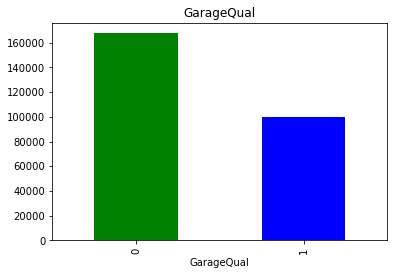

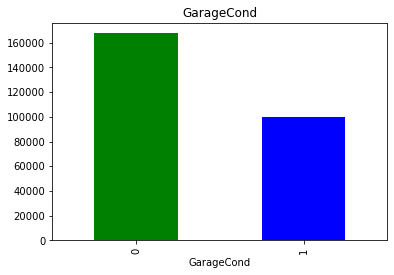

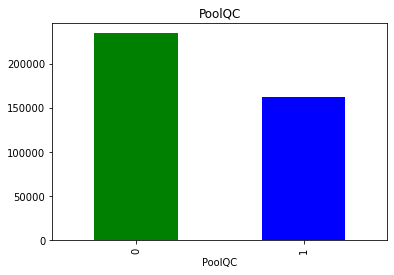

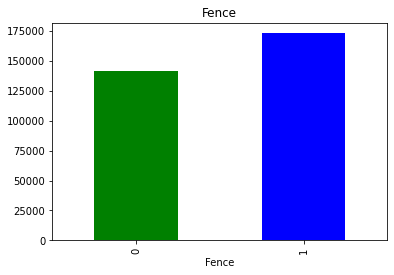

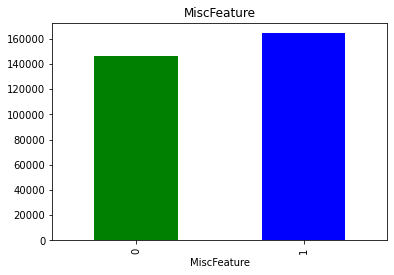

In [9]:
color=['green','blue']
for feature in features_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar(color=color)
    plt.title(feature)
    plt.show()

As you can see the Sale Price is dependant on the missing values. Therefore we have to handle missing values and we cannot simply drop it because of the dependancy.

**Numerical and Datetime Variables**

In [10]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('No. of Numerical variables:', len(num_features))

No. of Numerical variables: 38


In [11]:
#finding out all the features with keyword YEAR in them for datetime variable

yr_feature = [feature for feature in num_features if 'Yr' in feature or 'Year' in feature] 
print(yr_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [12]:
for feature in yr_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

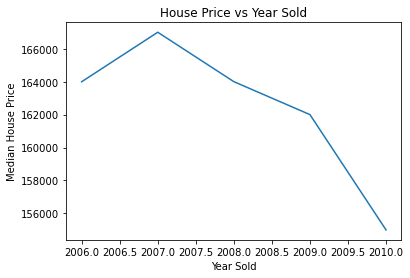

In [13]:
#plotting datetime variables with SalePrice to find relation

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

From this graph we can say that the median house prices has reduced drastically from 2007.

Text(0.5, 1.0, 'House Price vs Year Built')

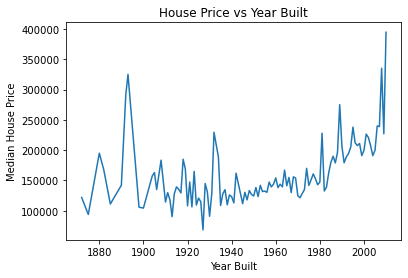

In [14]:
df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Built')

As you can infer from the graph, the median house price has increased at the later years(ard 2000s) compared to before(ard 1800s-1900s).

Text(0.5, 1.0, 'House Price vs Year Remodeled')

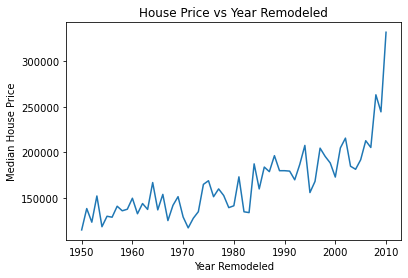

In [15]:
df.groupby('YearRemodAdd')['SalePrice'].median().plot()
plt.xlabel('Year Remodeled')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Remodeled')

We can see that the newly remodeled houses are more expensive than the older ones.

Text(0.5, 1.0, 'House Price vs Year Garage was built')

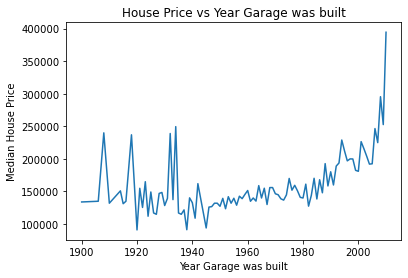

In [16]:
df.groupby('GarageYrBlt')['SalePrice'].median().plot()
plt.xlabel('Year Garage was built')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Garage was built')

It's the same case with this graph also. Newly built garages have more value.

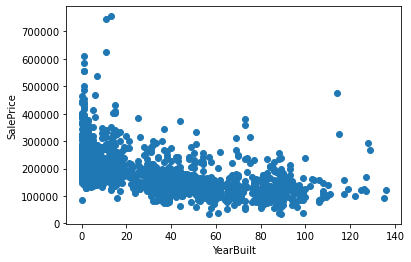

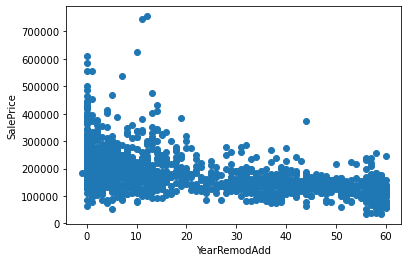

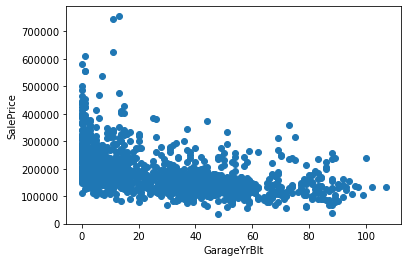

In [17]:
#same inference through different graphs
for feature in yr_feature:
    if feature != 'YrSold':
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

**Discrete Features**

In [18]:
disc_features = [feature for feature in num_features if len(df[feature].unique())<25 and feature not in yr_feature + ['Id']]
print('No.of discrete features', format(len(disc_features)))
print(disc_features)

No.of discrete features 17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [19]:
df[disc_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


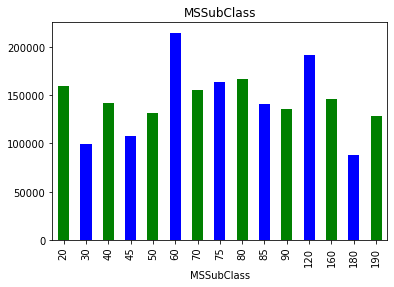

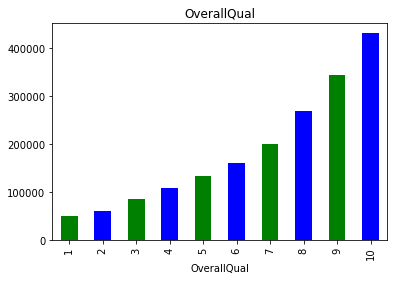

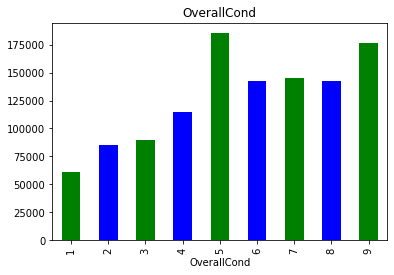

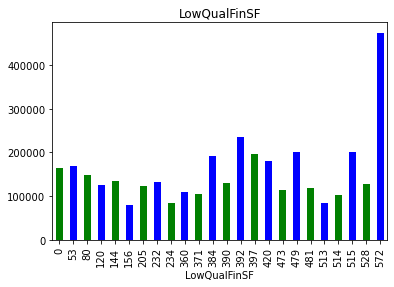

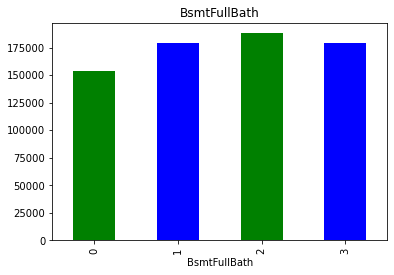

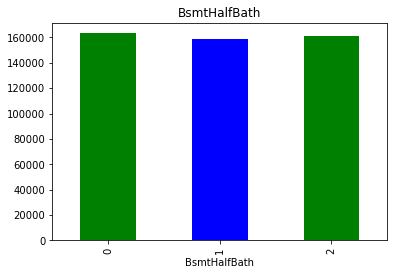

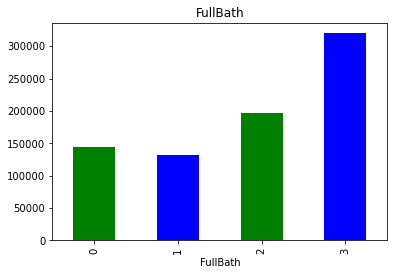

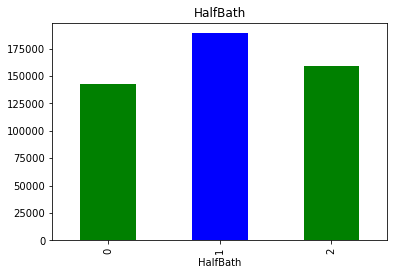

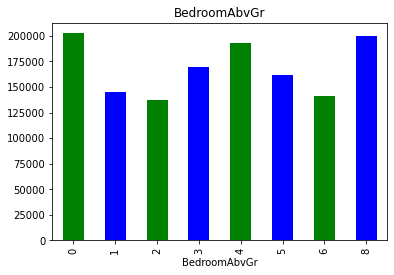

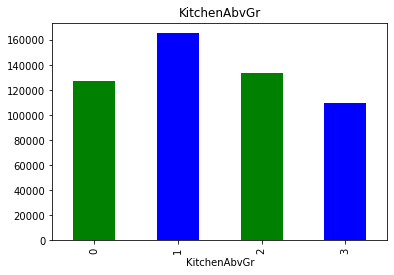

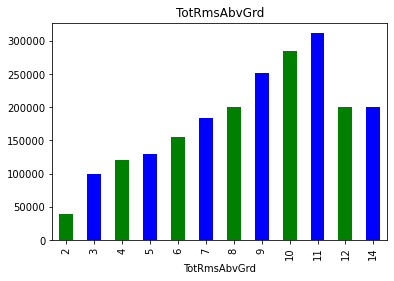

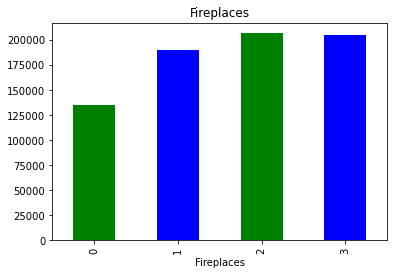

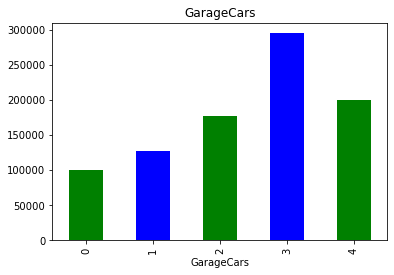

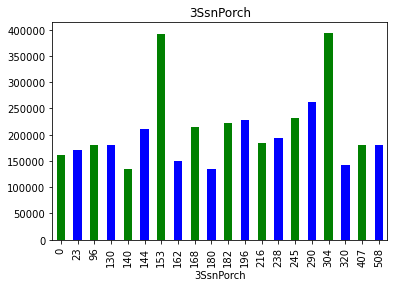

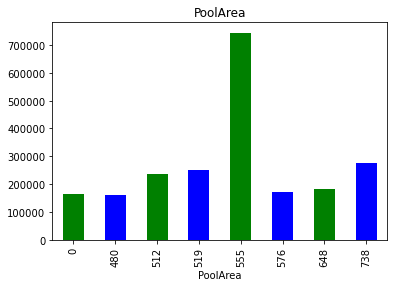

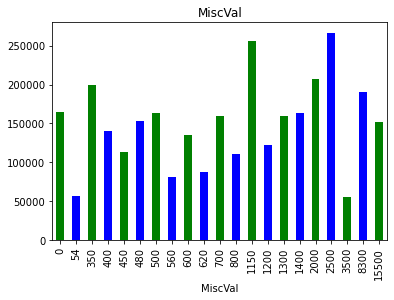

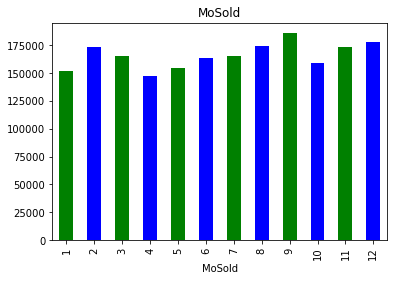

In [20]:
for feature in disc_features:
    data = df.copy()

    data.groupby(feature)['SalePrice'].median().plot.bar(color=color)
    plt.title(feature)
    plt.show()

In [21]:
cont_features = [feature for feature in num_features if feature not in disc_features + yr_feature + ['Id']]
print('No.of continuous features', format(len(cont_features)))
print(cont_features)

No.of continuous features 16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


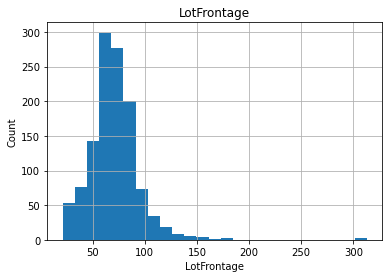

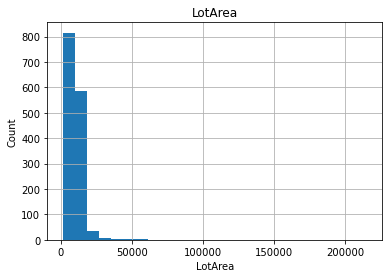

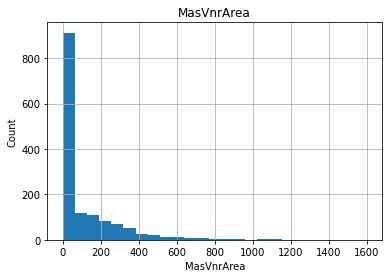

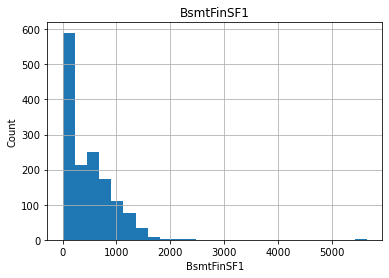

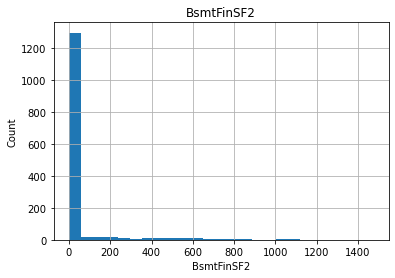

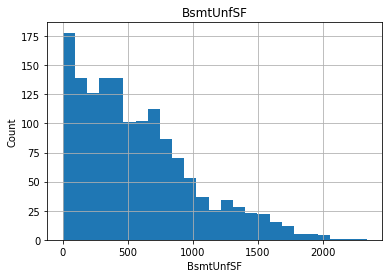

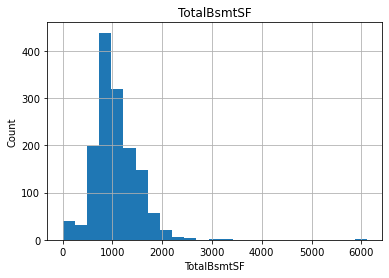

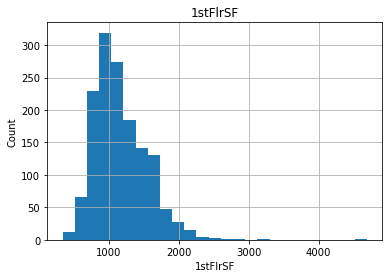

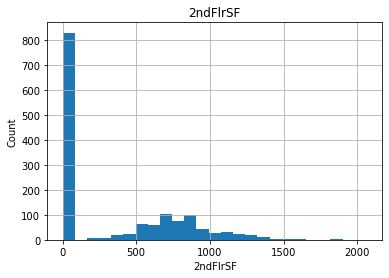

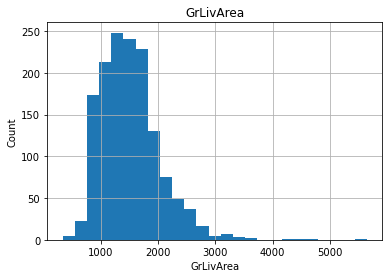

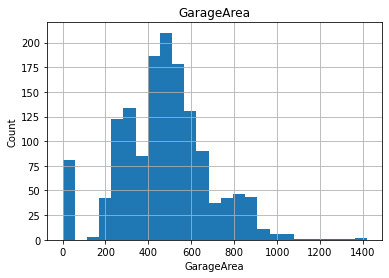

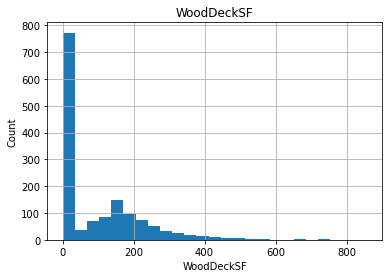

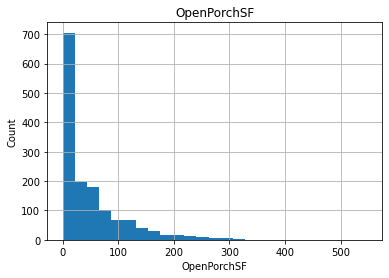

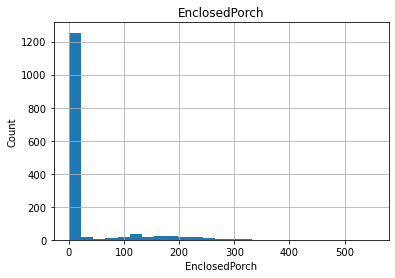

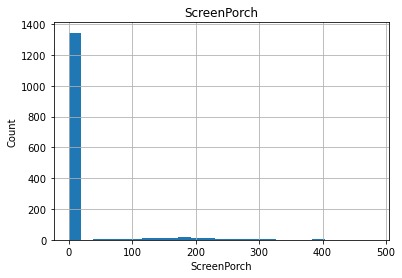

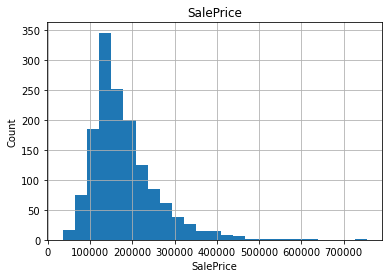

In [22]:
#We use histograms to look at the continous features
for feature in cont_features:
    data = df.copy()

    data[feature].hist(bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

As you can infer from the graphs above, the data is not normally distributed in most cases. We have to apply a transformation method to normally distribute the data.

We will be using Logarithmic Transformation in this case.

In Log transformation each variable of x will be replaced by log(x) with base 10, base 2, or natural log.

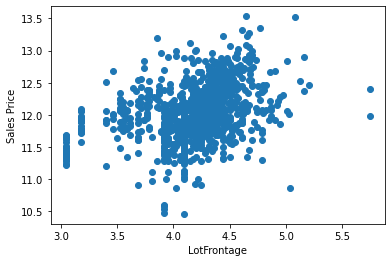

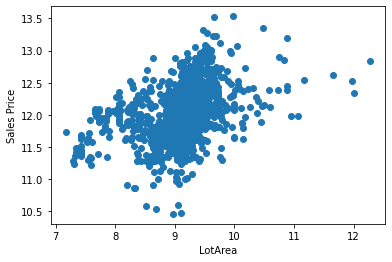

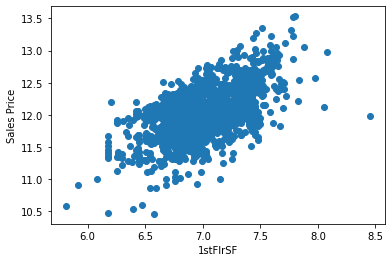

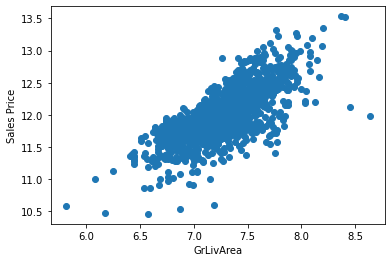

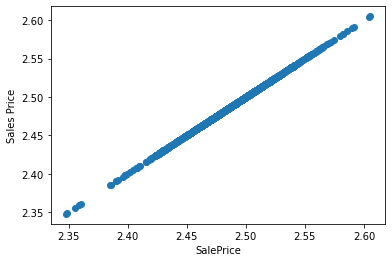

In [27]:
#method 1 using np.log

for feature in cont_features:
    data = df.copy() 
    if 0 in data[feature].unique():     #this condition is used because log 0 is undefined so we are excluding it
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.show()

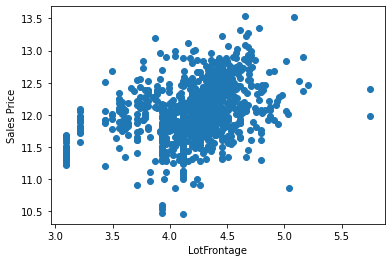

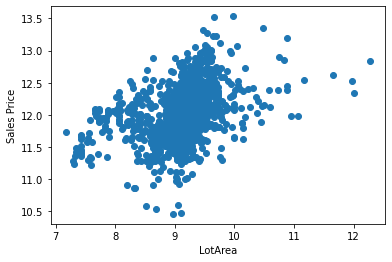

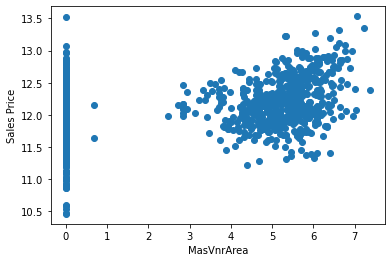

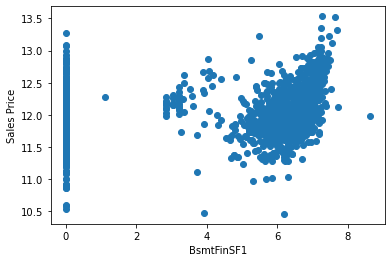

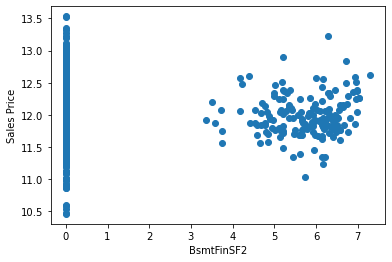

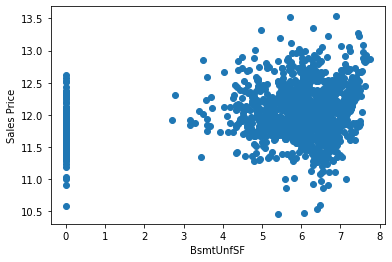

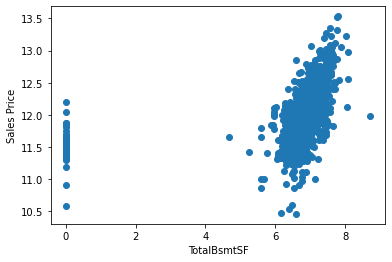

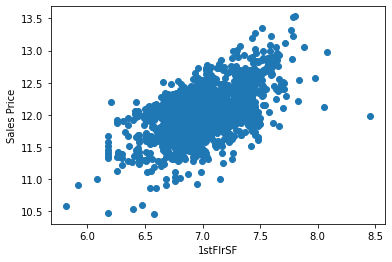

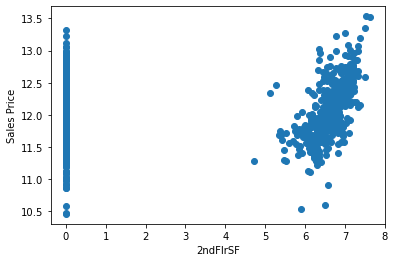

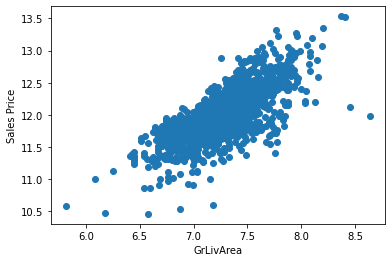

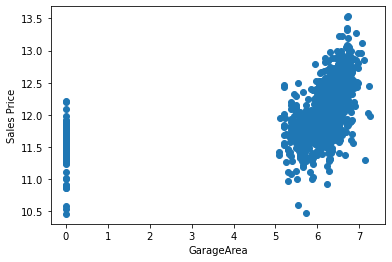

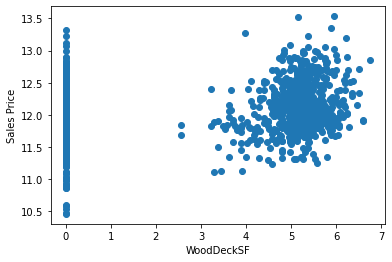

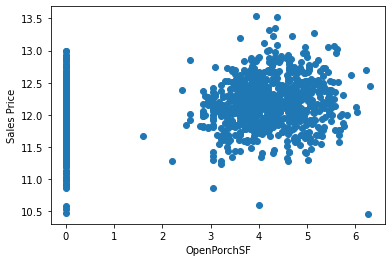

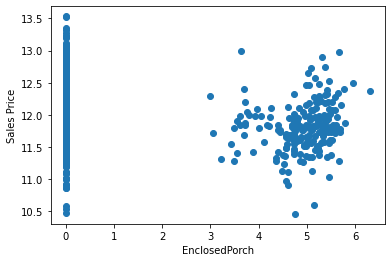

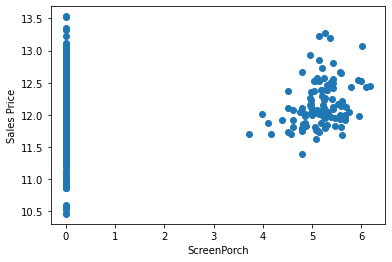

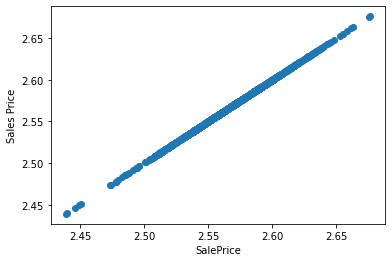

In [29]:
#method 2 using np.log1p-excludes 0 automatically

for feature in cont_features:
    data = df.copy() 
    data[feature] = np.log1p(data[feature])
    data['SalePrice'] = np.log1p(data['SalePrice'])
    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.show()